In [2]:
# 라이브러리 호출
import FinanceDataReader as fdr
import numpy as np
import pandas as pd

In [3]:
# Finance Data Reader 버전 확인
fdr.__version__

'0.9.31'

In [4]:
# 데이터프레임 저장.
# 036570은 엔씨소프트의 종목코드이고, 2011년부터 2022년(최근)까지의
# 데이터를 불러왔다.
df = fdr.DataReader('036570', '2011', '2022')

In [5]:
df.head(10)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2011-01-03,210500,210500,206000,207000,244065,-0.007194
2011-01-04,209000,209500,200000,206500,278634,-0.002415
2011-01-05,207000,207000,202000,205500,292235,-0.004843
2011-01-06,203500,211500,199500,210500,524283,0.024331
2011-01-07,212000,220000,211500,218500,565293,0.038005
2011-01-10,218500,220000,213500,217000,179136,-0.006865
2011-01-11,215500,220000,211500,218500,335419,0.006912
2011-01-12,221500,222000,211500,212000,370071,-0.029748
2011-01-13,210000,211000,203000,204500,544342,-0.035377


In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2674 entries, 2011-01-03 to 2021-11-09
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2674 non-null   int64  
 1   High    2674 non-null   int64  
 2   Low     2674 non-null   int64  
 3   Close   2674 non-null   int64  
 4   Volume  2674 non-null   int64  
 5   Change  2674 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 146.2 KB


In [228]:
# 데이터 전처리와 시각화 라이브러리
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

<AxesSubplot:>

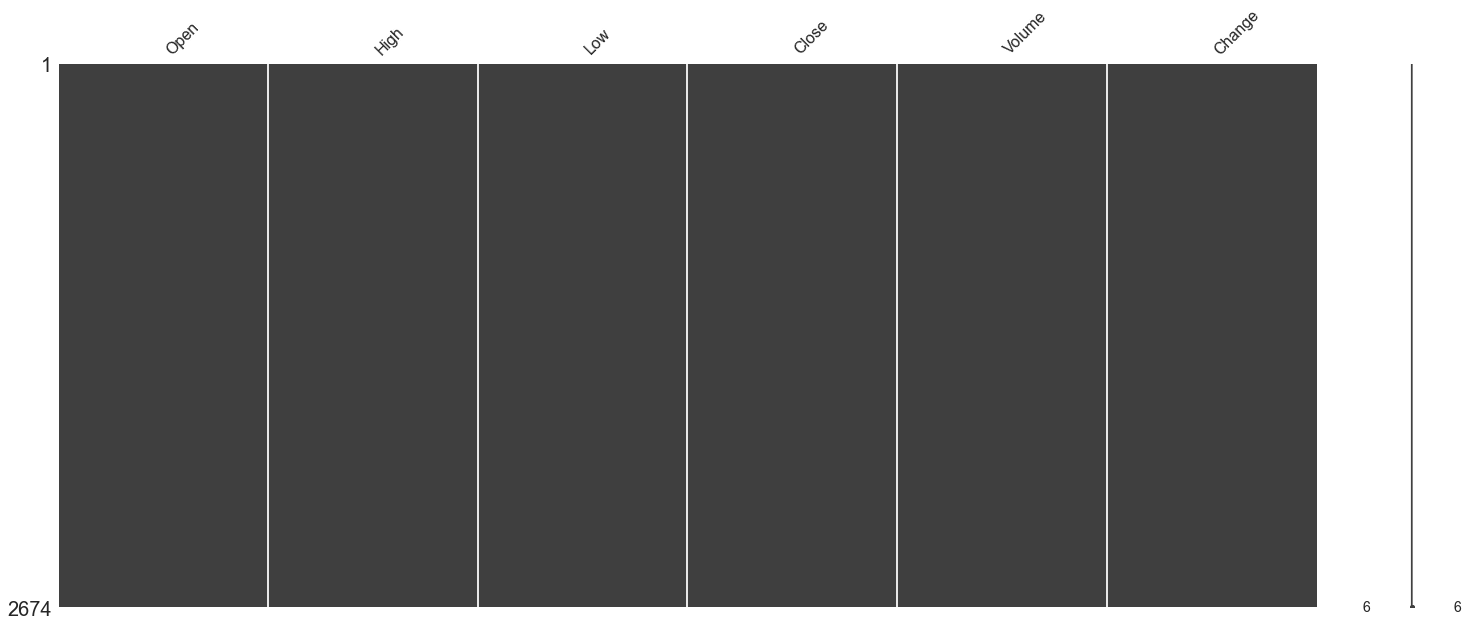

In [229]:
# 결측 데이터 시각화
msno.matrix(df)

In [230]:
# 결측 데이터 수치화
for col in df.columns:
    print("Column: {:>10}. Number of NaN data: {:5}".
    format(col, df[col].isnull().any())
    )

Column:       Open. Number of NaN data:     0
Column:       High. Number of NaN data:     0
Column:        Low. Number of NaN data:     0
Column:      Close. Number of NaN data:     0
Column:     Volume. Number of NaN data:     0
Column:     Change. Number of NaN data:     0


Text(0.5, 1.0, 'Close Stock Price')

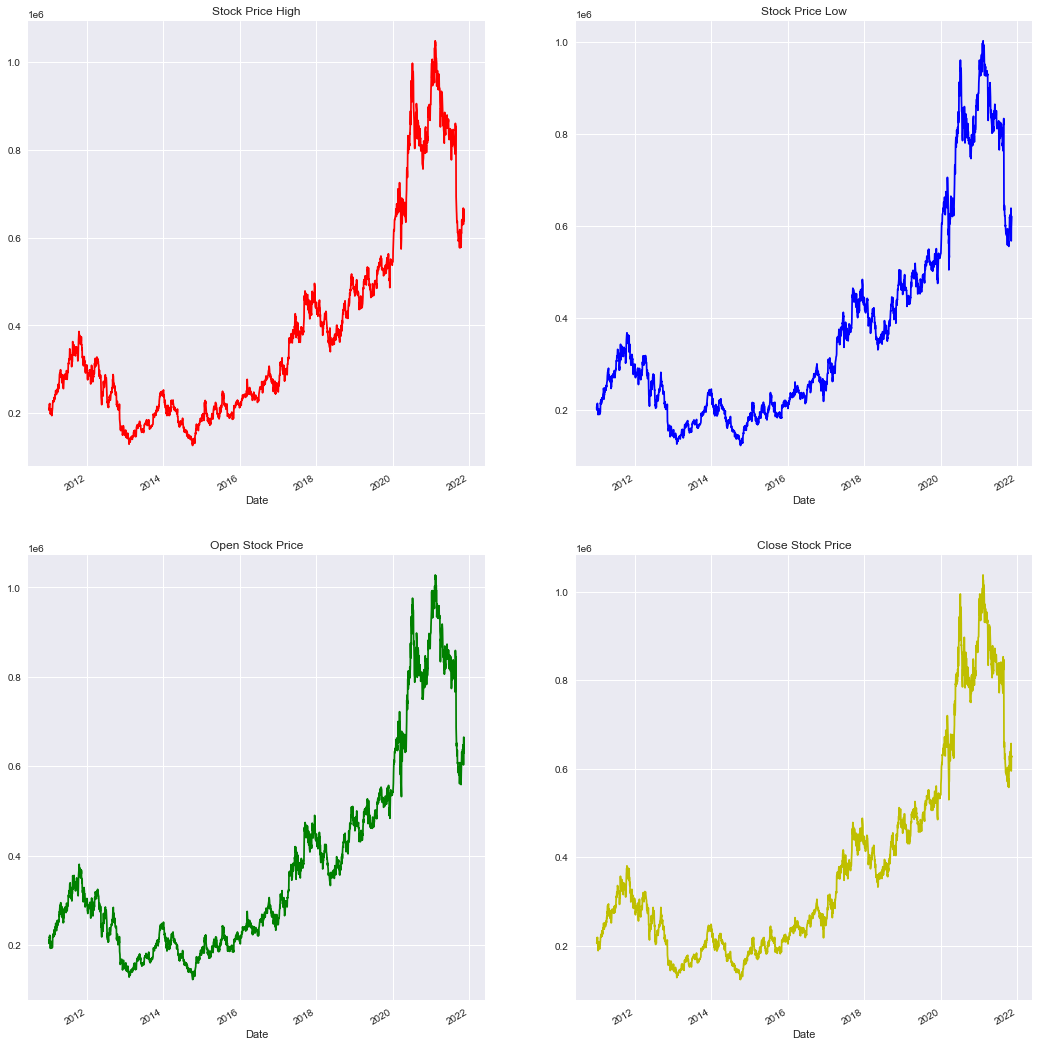

In [231]:
# 2x2 그래프 생성
fig, ax = plt.subplots(2,2, figsize = (18, 20))

df['High'].plot.line(ax = ax[0][0], c = 'r')
ax[0][0].set_title("Stock Price High")

df['Low'].plot.line(ax = ax[0][1], c = 'b')
ax[0][1].set_title("Stock Price Low")

df['Open'].plot.line(ax = ax[1][0], c = 'g')
ax[1][0].set_title("Open Stock Price")

df['Close'].plot.line(ax = ax[1][1], c = 'y')
ax[1][1].set_title("Close Stock Price")

stock_close_data = df.pop('Close')
df.drop(['Change', 'Volume'], axis = 1, inplace = True)
stock_learn_data = df

print("Stock Close Data Shape: ", stock_close_data.shape)
print("Stock Learn Data Shape: ", stock_learn_data.shape)

In [232]:
stock_close_data = df['Close']
stock_close_data = stock_close_data.values.reshape((stock_close_data.shape[0], 1))

In [233]:
# 입력 데이터 전처리 라이브러리.
from sklearn.preprocessing import MinMaxScaler

# 데이터 정규화
scaler = MinMaxScaler(feature_range=(0, 1))
stock_close_data_scaled = scaler.fit_transform(stock_close_data)
print("stock close data shape: ", stock_close_data_scaled.shape)

stock close data shape:  (2674, 1)


Text(0.5, 1.0, 'Data After Scaler')

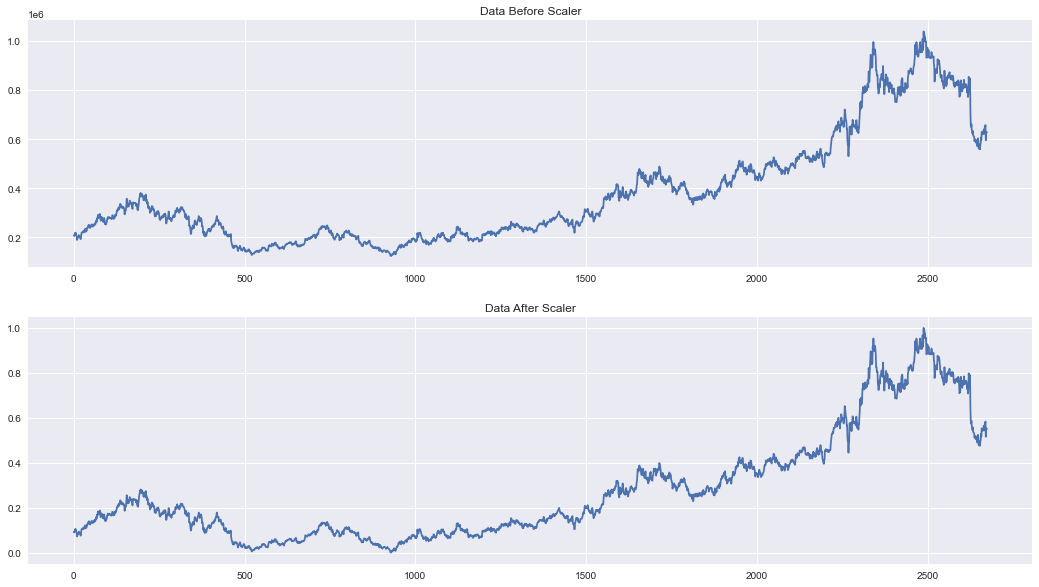

In [234]:
fig, ax = plt.subplots(2, figsize = (18, 10))

ax[0].plot(stock_close_data)
ax[0].set_title("Data Before Scaler")

ax[1].plot(stock_close_data_scaled)
ax[1].set_title("Data After Scaler")

In [235]:
# 윈도우 표준화
input_data = []
input_y = []

# 윈도우 크기
timestamps = 50

# 표준화 진행
for i in range(timestamps, len(stock_close_data_scaled)):
    input_data.append(stock_close_data_scaled[i - timestamps:i,0])
    input_y.append(stock_close_data_scaled[i,0])

# np.array로 변환
input_data = np.array(input_data)
input_y = np.array(input_y)

print("input data shape: ", input_data.shape)
print("input y shape: ", input_y.shape)

input data shape:  (2624, 50)
input y shape:  (2624,)


In [236]:
input_data = input_data.reshape(input_data.shape[0], input_data.shape[1], 1)
input_y = input_y.reshape(input_y.shape[0], 1)

print("input data shape: ", input_data.shape)
print("input y shape: ", input_y.shape)

input data shape:  (2624, 50, 1)
input y shape:  (2624, 1)


In [237]:
train_data = input_data[:1674]
train_y = input_y[:1674]

validation_data = input_data[1674:2174]
validation_y = input_y[1674:2174]

test_data = input_data[2174:2674]
test_y = input_y[2174:2674]

print("train data shape: ", train_data.shape)
print("train y shape: ", train_y.shape)

print("validation data shape: ", validation_data.shape)
print("validation y shape: ", validation_y.shape)

print("test data shape: ", test_data.shape)
print("test y shape: ", test_y.shape)

train data shape:  (1674, 50, 1)
train y shape:  (1674, 1)
validation data shape:  (500, 50, 1)
validation y shape:  (500, 1)
test data shape:  (450, 50, 1)
test y shape:  (450, 1)


In [238]:
# 기계 학습 라이브러리
from keras.layers import Dense, SimpleRNN, LSTM
import tensorflow

In [239]:
# SimpleRNN 모델
model = tensorflow.keras.models.Sequential()
model.add(SimpleRNN(units = 10, activation = 'tanh', input_shape = (50, 1)))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse', metrics=['mae'])

In [240]:
# LSTM 모델
model2 = tensorflow.keras.models.Sequential()
model2.add(LSTM(units = 10, activation = 'tanh', input_shape = (50, 1)))
model2.add(Dense(1))
model2.compile(optimizer = 'adam', loss = 'mse', metrics=['mae'])

In [241]:
# SimpleRNN 모델
hist = model.fit(
    train_data, train_y,
    batch_size = 16, epochs = 1000,
    validation_data = (validation_data, validation_y)
)

Epoch 1/1000
105/105 [==============================] - 1s 4ms/step - loss: 8.3679e-04 - mae: 0.0198 - val_loss: 0.0032 - val_mae: 0.0482
Epoch 2/1000
105/105 [==============================] - 0s 3ms/step - loss: 2.2612e-04 - mae: 0.0114 - val_loss: 7.1396e-04 - val_mae: 0.0214
Epoch 3/1000
105/105 [==============================] - 0s 3ms/step - loss: 1.5611e-04 - mae: 0.0094 - val_loss: 7.4074e-04 - val_mae: 0.0219
Epoch 4/1000
105/105 [==============================] - 0s 3ms/step - loss: 1.2837e-04 - mae: 0.0085 - val_loss: 4.3188e-04 - val_mae: 0.0166
Epoch 5/1000
105/105 [==============================] - 0s 3ms/step - loss: 1.1051e-04 - mae: 0.0078 - val_loss: 4.2346e-04 - val_mae: 0.0164
Epoch 6/1000
105/105 [==============================] - 0s 3ms/step - loss: 9.7165e-05 - mae: 0.0072 - val_loss: 3.9294e-04 - val_mae: 0.0159
Epoch 7/1000
105/105 [==============================] - 0s 3ms/step - loss: 8.9245e-05 - mae: 0.0070 - val_loss: 4.1945e-04 - val_mae: 0.0166
Epoch 8/10

In [242]:
# LSTM 모델
hist2 = model2.fit(
    train_data, train_y,
    batch_size = 16, epochs = 1000,
    validation_data = (validation_data, validation_y)
)

Epoch 1/1000
105/105 [==============================] - 2s 9ms/step - loss: 0.0066 - mae: 0.0555 - val_loss: 0.0011 - val_mae: 0.0256
Epoch 2/1000
105/105 [==============================] - 1s 7ms/step - loss: 4.4692e-04 - mae: 0.0167 - val_loss: 8.9053e-04 - val_mae: 0.0236
Epoch 3/1000
105/105 [==============================] - 1s 7ms/step - loss: 3.9520e-04 - mae: 0.0156 - val_loss: 8.8055e-04 - val_mae: 0.0233
Epoch 4/1000
105/105 [==============================] - 1s 7ms/step - loss: 3.6747e-04 - mae: 0.0150 - val_loss: 7.5241e-04 - val_mae: 0.0216
Epoch 5/1000
105/105 [==============================] - 1s 7ms/step - loss: 3.4962e-04 - mae: 0.0146 - val_loss: 6.1982e-04 - val_mae: 0.0198
Epoch 6/1000
105/105 [==============================] - 1s 7ms/step - loss: 3.2193e-04 - mae: 0.0140 - val_loss: 5.7576e-04 - val_mae: 0.0191
Epoch 7/1000
105/105 [==============================] - 1s 7ms/step - loss: 3.0251e-04 - mae: 0.0135 - val_loss: 5.3976e-04 - val_mae: 0.0185
Epoch 8/1000
1

In [243]:
# 모델 예측 결과 저장
prediction_rnn = model.predict(test_data)
prediction_lstm = model2.predict(test_data)

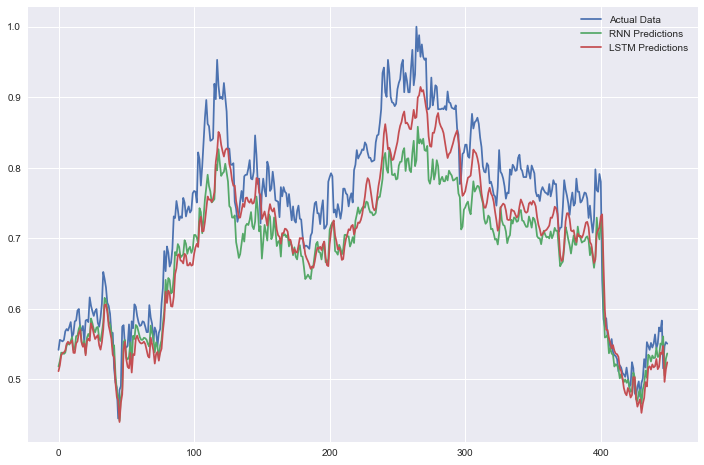

In [245]:
# 예측 결과 시각화
plt.figure(figsize=(12, 8))
plt.plot(test_y, label = "Actual Data")
plt.plot(prediction_rnn, label = "RNN Predictions")
plt.plot(prediction_lstm, label = "LSTM Predictions")
plt.legend()